**Objetivo del proyecto**: Desarrollar un modelo predictivo de clasificación binaria que permita identificar transacciones financieras potencialmente fraudulentas, utilizando técnicas de machine learning supervisado. El propósito es optimizar la detección de fraude en medios de pago digitales.

In [1]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")


# **EDA**:

In [2]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109025 entries, 0 to 109024
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    109025 non-null  int64  
 1   V1      109025 non-null  float64
 2   V2      109025 non-null  float64
 3   V3      109025 non-null  float64
 4   V4      109025 non-null  float64
 5   V5      109025 non-null  float64
 6   V6      109025 non-null  float64
 7   V7      109025 non-null  float64
 8   V8      109025 non-null  float64
 9   V9      109025 non-null  float64
 10  V10     109025 non-null  float64
 11  V11     109025 non-null  float64
 12  V12     109025 non-null  float64
 13  V13     109025 non-null  float64
 14  V14     109025 non-null  float64
 15  V15     109025 non-null  float64
 16  V16     109025 non-null  float64
 17  V17     109025 non-null  float64
 18  V18     109025 non-null  float64
 19  V19     109025 non-null  float64
 20  V20     109025 non-null  float64
 21  V21     10

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,...,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000
mean,44645.276707,-0.256883,-0.025148,0.682026,0.156138,-0.283840,0.096437,-0.115878,0.058907,-0.058148,...,-0.031439,-0.108487,-0.037077,0.010548,0.133002,0.025850,0.001697,0.001575,95.976655,0.002192
std,17910.956447,1.851918,1.646552,1.312689,1.342222,1.345002,1.297956,1.204303,1.228831,1.107857,...,0.739326,0.639778,0.625171,0.595426,0.439685,0.491488,0.392049,0.319122,259.985100,0.046770
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,34466.000000,-1.022536,-0.594704,0.176662,-0.711427,-0.906796,-0.647201,-0.604942,-0.134455,-0.698260,...,-0.224526,-0.535608,-0.176381,-0.323376,-0.130809,-0.323685,-0.061028,-0.004984,7.000000,0.000000
50%,46486.000000,-0.260725,0.078851,0.757593,0.184474,-0.318199,-0.156136,-0.071019,0.077647,-0.124576,...,-0.057137,-0.084788,-0.049097,0.066487,0.170840,-0.068262,0.010695,0.023386,25.000000,0.000000
75%,59079.000000,1.155066,0.739987,1.381997,1.021482,0.243535,0.490683,0.410307,0.368885,0.536933,...,0.120029,0.312712,0.080875,0.407577,0.420394,0.293750,0.084706,0.076715,86.982500,0.000000
max,71184.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


**Las variables V1 a V28**: son el resultado de aplicar PCA (Análisis de Componentes Principales) sobre los datos originales por temas de confidencialidad. Seguramente el dataset fue anonimizado para proteger los datos reales. Ya se encuentran normalizados ya que la media es cercana a 0.

**La variable Time**: representa el tiempo en segundos transcurrido desde la primera transacción del dataset. Presenta valores muy extremos, por lo tanto requieren tratamiento.

**El monto (Amount)**: varía entre 0 y casi 20.000, pero el 75% de las transacciones son menores a 87, lo que indica una gran cantidad de microtransacciones. Tiene una alta desviación estándar (~260) con un máximo de más de $19.000, lo que también sugiere outliers.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

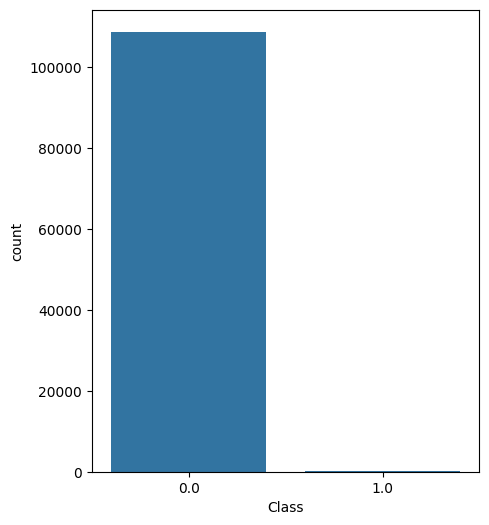

In [8]:
plt.figure(figsize = (5,6))
sns.countplot(data = df, x = df["Class"])

In [11]:
conteo = df["Class"].value_counts()
print(conteo)

Class
0.0    108785
1.0       239
Name: count, dtype: int64


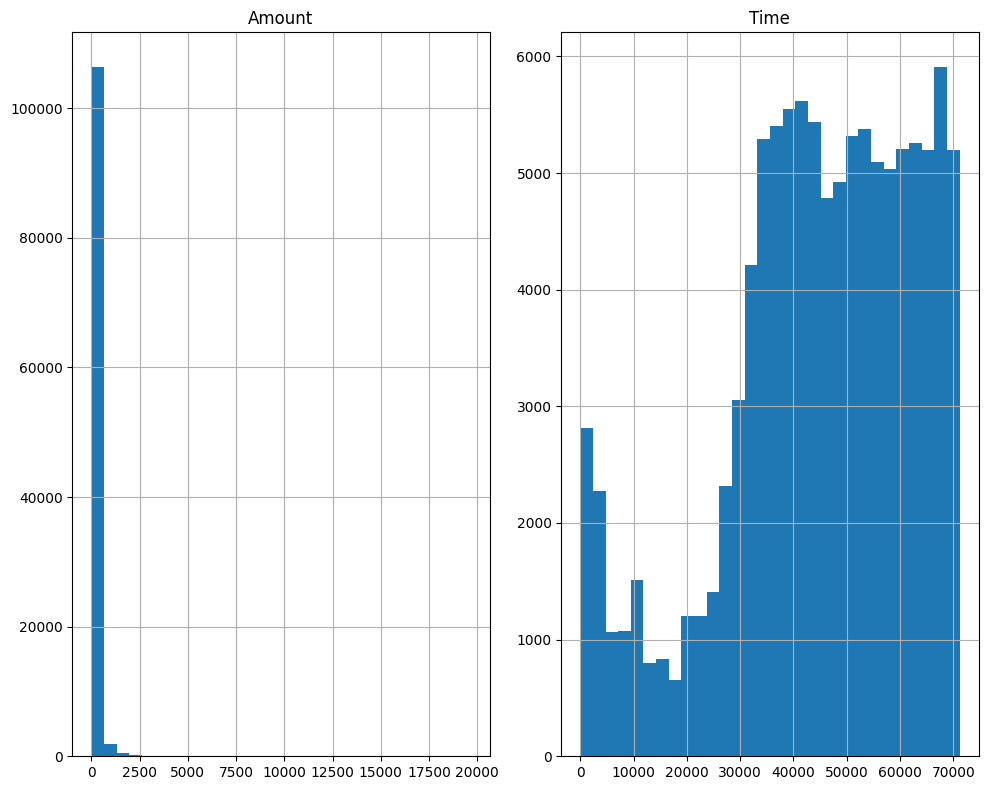

In [19]:
df[["Amount", "Time"]].hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

**Amount**: varía entre 0 y casi 20.000, el 75% de las transacciones son menores a 87. Posee outliers.

In [22]:
conteo2 = df["Amount"].value_counts()
print(conteo2)

Amount
1.00      4583
1.98      1982
9.99      1708
0.89      1559
15.00     1264
          ... 
204.21       1
468.29       1
219.42       1
29.15        1
522.12       1
Name: count, Length: 20558, dtype: int64


**Correlación**:

In [30]:
corr_max = df.corr()
corr_max["Class"].sort_values(ascending = False)

,Class
Class,1.000000
V11,0.179808
V4,0.160327
V2,0.119698
V21,0.087963
V27,0.063579
V8,0.058783
V19,0.044956
V20,0.013613
V28,0.009706


Las variables más relacionadas con el fraude son: V11, V4, V2, V17, V14.

Sin embargo, es posible que Amount y Time tengan relaciones no lineales o interacciones con otras variables que sí sean útiles.

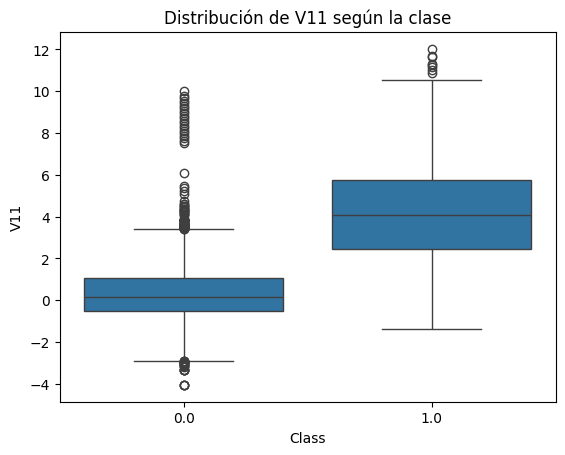

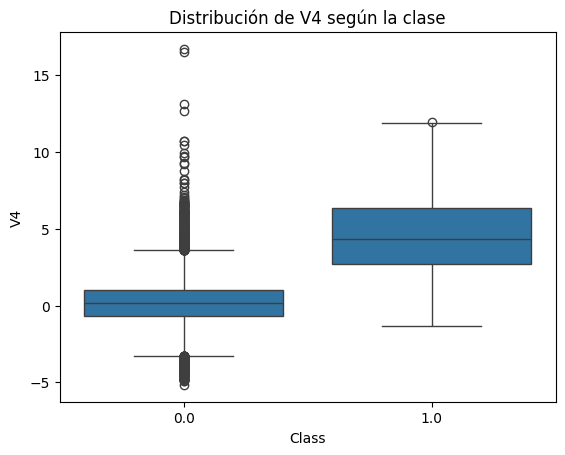

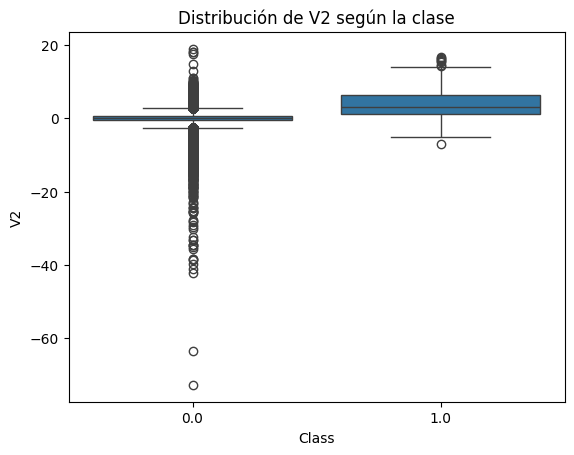

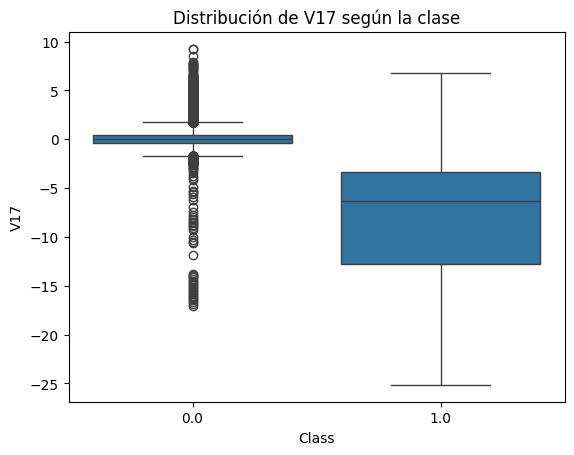

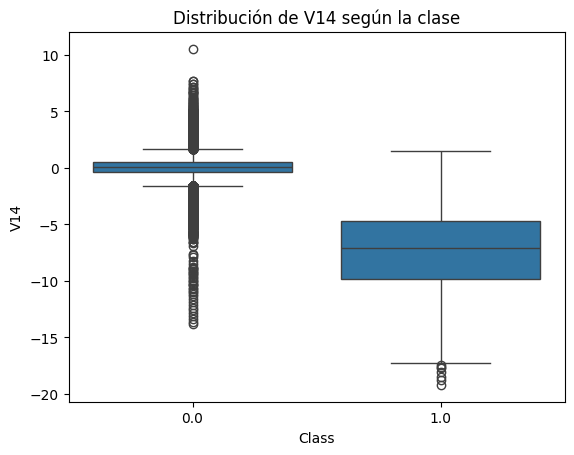

In [33]:
# Visualizamos variables con mayor correlación positiva y negativa
variables_interes = ['V11', 'V4', 'V2', 'V17', 'V14']

for col in variables_interes:
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Distribución de {col} según la clase')
    plt.show()


**V11**

Observación: La mediana de V11 para fraudes (Class = 1) es mucho mayor (alrededor de 4) que para transacciones normales (alrededor de 0).

Dispersión: Hay más valores altos en fraude; los valores típicos de transacciones legítimas se agrupan entre -1 y 2.

Conclusión: Muy buena variable discriminante. Ayuda a separar claramente fraudes de no fraudes. Puede tener mucho peso en el modelo.

**V4**

Observación: Clarísima separación de medianas (más de 5 en fraudes vs ~0 en normales).

Fraudes con valores más altos, sin muchos outliers como en Class = 0.

Conclusión: Gran candidata predictiva. Podría indicar que ciertas combinaciones de inputs se disparan en el fraude.

**V2**

Observación: Transacciones normales tienen una nube enorme de outliers negativos (hasta -60), mientras que las fraudulentas están contenidas.

Fraudes bien agrupados en un rango más chico, positivos, lo cual es interesante.

Conclusión: la dispersión cada clase es distinta, quizas es útil.

**V17**

Observación: Clarísima diferencia de mediana: muy negativa en Class = 1, neutra en Class = 0.

Distribución muy sesgada hacia valores negativos para fraude.

Conclusión: Excelente señal para detectar fraude. Incluso visualmente se ve que si V17 baja mucho, es altamente sospechoso.


**V14**

Observación: Patrón similar al de V17.

Los fraudes tienen valores consistentemente más negativos.

Conclusión: Muy buena variable. Como V17, parece que cuando baja, el riesgo de fraude sube.



# **Data wrangling:**

**Nulos**

In [34]:
print(df.isnull().sum() / len(df) * 100)

Time      0.000000
V1        0.000000
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000000
V15       0.000000
V16       0.000000
V17       0.000000
V18       0.000000
V19       0.000000
V20       0.000000
V21       0.000917
V22       0.000917
V23       0.000917
V24       0.000917
V25       0.000917
V26       0.000917
V27       0.000917
V28       0.000917
Amount    0.000917
Class     0.000917
dtype: float64


In [35]:
df = df.dropna()

En este proyecto se ha optado por utilizar XGBoost como modelo base. Al tratarse de un algoritmo basado en árboles, no requiere que las variables estén normalizadas ni transformadas para simetría, ya que trabaja con umbrales de decisión y no depende de escalas o distribuciones.

Asimismo, los outliers no afectan negativamente al modelo, ya que los árboles pueden dividir los datos en función de ellos sin distorsionar la predicción general. Por lo tanto, en esta etapa no se aplicaron técnicas de escalado, eliminación de outliers ni transformaciones logarítmicas.

# **Modelado:**

In [36]:
X = df[['V11', 'V4', 'V2', 'V17', 'V14', 'Amount', 'Time']]  # Features
y = df['Class']  # Target

Estas 7 variables fueron seleccionadas en el análisis exploratorio previo porque mostraron patrones claros de diferencia entre clases. Esta selección inicial permite entrenar un modelo simple y explicativo rápidamente.

**División en train/test con estratificación**

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X e y: los datos que queremos dividir.

test_size=0.2: significa que el 20% de los datos se usará para evaluación final.

stratify=y: asegura que tanto en train como en test haya la misma proporción de fraudes y no fraudes. Esto es crucial porque hay muy pocos fraudes.

random_state=42: hace que el resultado sea siempre el mismo cada vez que lo corras (para que sea reproducible).

**Entrenamiento simple con validación cruzada**

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


# Calculamos el peso relativo de la clase minoritaria (fraude)
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

model_simple = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

# Validación cruzada con 5 particiones
scores = cross_val_score(model_simple, X_train, y_train, cv=5, scoring='f1')
print(f"F1 promedio (cross-validation): {scores.mean():.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

F1 promedio (cross-validation): 0.8590


**scale_pos_weight** es un parámetro de XGBoost que le da más importancia a predecir correctamente los fraudes, porque si no, el modelo se queda en predecir solo “no fraude” y acierta el 99% de las veces, pero no sirve. La formula es el (largo de la lista - cantidad de fraudes) / cantidad de fraudes.

**use_label_encoder=False**: evita un warning innecesario (XGBoost solía requerir codificación especial de etiquetas, ya no).

**eval_metric='logloss'**: es la función que mide el error del modelo durante el entrenamiento. logloss es típica para clasificación.

**random_state=42**: para que los resultados sean reproducibles.

**scale_pos_weight**: lo que calculamos antes, le indica al modelo que los fraudes son raros y deben tener más peso.

**cross_val_score**: Entrena el modelo 5 veces, cada vez usando una porción diferente como validación.

La métrica usada es F1, que combina precisión y recall:

Precisión: de todas las veces que dijo "fraude", ¿cuántas acertó?

Recall: de todos los fraudes reales, ¿cuántos encontró?

La F1 es muy útil cuando las clases están desbalanceadas, como acá

**Conclusion**: El modelo entrenado con las 7 variables seleccionadas manualmente (V11, V4, V2, V17, V14, Amount, Time) logró un F1-score promedio de 0.8590 en validación cruzada con 5 particiones. Es decir, funciona.

Esto indica que el modelo tiene un muy buen equilibrio entre precisión y recall. Es decir:

*   Precisión: Representa el % de las veces que el modelo acierta cuando dice una clase.

*   Recall: Representa el % de los positivos reales que el modelo detectó.



**Entrenamiento y evaluación en test set**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Entrenamos sobre todo el conjunto de entrenamiento
model_simple.fit(X_train, y_train) #model_simple ya fue ajustado en el paso anterior, lo reutilizamos.

# Predicción y evaluación
y_pred = model_simple.predict(X_test)
y_proba = model_simple.predict_proba(X_test)[:, 1]

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}") #roc_auc_score: Es una función de sklearn.metrics que calcula el AUC de tu modelo. :.4f le da formato de 4 decimales (ejemplo: 0.9876). f"AUC: {...}" es una f-string que inserta el resultado directamente en el texto.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21757
         1.0       0.95      0.88      0.91        48

    accuracy                           1.00     21805
   macro avg       0.98      0.94      0.96     21805
weighted avg       1.00      1.00      1.00     21805

Matriz de confusión:
[[21755     2]
 [    6    42]]
AUC: 0.9801


**Conclusión**:

El modelo entrenado con las variables seleccionadas logró un rendimiento excelente al evaluarse sobre el conjunto de test, que no había sido utilizado durante el entrenamiento ni la validación cruzada.

F1-score para la clase fraudulenta: 0.91

Recall para fraude: 0.88 → el modelo detecta el 88% de las transacciones fraudulentas.

Precision para fraude: 0.95 → el 95% de las transacciones marcadas como fraude fueron correctamente clasificadas.

AUC: 0.98 → excelente capacidad para separar clases.

La matriz de confusión mostró solo 6 fraudes no detectados y 2 falsos positivos, lo cual es un resultado muy sólido dada la gran desproporción entre clases. En conjunto, estos valores indican que el modelo es altamente eficaz para identificar fraudes en un escenario de datos desbalanceados.

In [46]:
from sklearn.model_selection import RandomizedSearchCV

params = {    #Definís el espacio de búsqueda de hiperparámetros, esto es lo que RandomizedSearchCV va a explorar al aza
    'n_estimators': [100, 200, 300],   #cantidad de árboles (más árboles = más capacidad de aprendizaje).
    'max_depth': [3, 4, 5, 6],   #max_depth: profundidad de cada árbol (más profundo = más complejo).
    'learning_rate': [0.01, 0.05, 0.1],  #learning_rate: cuánto corrige cada nuevo árbol (menor = más preciso pero más lento).
    'subsample': [0.7, 0.8, 1],  #subsample: porcentaje de filas usadas en cada árbol (introduce aleatoriedad y evita overfitting).
    'colsample_bytree': [0.7, 0.8, 1],  #colsample_bytree: porcentaje de columnas usadas en cada árbol (más bajo = regularización).
    'scale_pos_weight': [scale_pos_weight]  #scale_pos_weight: equilibrio para clases desbalanceadas. Usá el valor calculado antes.
}

rs = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), #Configuramos el estimador, evitamos warning, eval_metric='logloss' (métrica de entrenamiento) y random_state=42 para que los resultados sean reproducibles.
    param_distributions=params, #combinaciones de hiperparámetros
    n_iter=20, #Solo va a probar 20 combinaciones aleatorias distintas
    scoring='f1', #El criterio para decidir qué combinación es la mejor es el F1-score
    cv=3,  #Usa validación cruzada con 3 particiones (3-fold) por cada combinación de hiperparámetros.
    verbose=1, #Hace que me muestre el proceso.
    n_jobs=-1 #Acelera el procesamiento.
)

rs.fit(X_train, y_train)  #Ejecutamos la búsqueda.
print("Mejores parámetros encontrados:")
print(rs.best_params_)  #best_params_ es un atributo propio del objeto RandomizedSearchCV que se crea automáticamente después de ejecutar .fit()

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:49:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros encontrados:
{'subsample': 0.8, 'scale_pos_weight': 455.64397905759165, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}


**Mejores hiperparámetros encontrados**:

A través de la búsqueda aleatoria (RandomizedSearchCV) con validación cruzada, se identificó la combinación óptima de hiperparámetros para el modelo XGBoost. Esta búsqueda se centró en maximizar el F1-score, una métrica especialmente relevante para problemas de clases desbalanceadas como la detección de fraude.

Los mejores hiperparámetros encontrados fueron:

n_estimators = 200: el modelo utiliza 200 árboles de decisión.

max_depth = 5: los árboles tienen una profundidad moderada, lo que balancea capacidad y generalización.

learning_rate = 0.1: se aplica una tasa de aprendizaje estándar que permite una convergencia eficiente.

subsample = 0.8: en cada iteración, el modelo entrena con el 80% de los datos, lo que introduce aleatoriedad y ayuda a prevenir overfitting.

colsample_bytree = 1: se utilizan todas las variables en cada árbol.

scale_pos_weight = 455.64: se aplica un peso elevado a la clase minoritaria (fraude), ajustando el desbalance del dataset.

In [50]:
best_model = rs.best_estimator_   #.best_estimator_ es un atributo automático que guarda el modelo final ya ajustado con la mejor combinación de hiperparámetros (best_params_)

y_pred_best = best_model.predict(X_train)  #Generás las predicciones de clase para el conjunto de entrenamiento (X_train).
y_proba_best = best_model.predict_proba(X_train)[:, 1] #Calculás las probabilidades de que cada muestra sea clase 1 (fraude).

print("Reporte final (modelo optimizado):")
print(classification_report(y_train, y_pred_best))
print(f"AUC: {roc_auc_score(y_train, y_proba_best):.4f}")

Reporte final (modelo optimizado):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     87028
         1.0       0.93      1.00      0.96       191

    accuracy                           1.00     87219
   macro avg       0.97      1.00      0.98     87219
weighted avg       1.00      1.00      1.00     87219

AUC: 1.0000


**Conclusión del modelo optimizado**:

El modelo final optimizado con búsqueda de hiperparámetros obtuvo un desempeño sobresaliente al ser evaluado sobre los datos de entrenamiento:

Precision en clase 1 (fraude): 0.93
→ El 93% de las transacciones identificadas como fraude efectivamente lo eran.

Recall en clase 1: 1.00
→ El modelo detectó el 100% de los fraudes reales, lo que es crítico en este tipo de aplicaciones.

F1-score en clase 1: 0.96
→ Muestra un excelente balance entre precisión y recall en la clase minoritaria.

Accuracy total: 1.00
→ Aunque el accuracy puede ser engañoso en conjuntos desbalanceados, en este caso es coherente con el resto de las métricas.

AUC = 1.0000
→ El modelo tiene una capacidad perfecta de discriminación entre transacciones fraudulentas y legítimas.

**Evaluación en el set de test (X_test, y_test)**

In [51]:
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_test))
print(f"AUC: {roc_auc_score(y_test, y_proba_test):.4f}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21757
         1.0       0.89      0.88      0.88        48

    accuracy                           1.00     21805
   macro avg       0.95      0.94      0.94     21805
weighted avg       1.00      1.00      1.00     21805

AUC: 0.9771


**Evaluación final del modelo en datos de test**:

El modelo optimizado fue evaluado sobre el conjunto de test, el cual no fue utilizado durante el entrenamiento ni la búsqueda de hiperparámetros. Los resultados obtenidos confirman que el modelo generaliza muy bien:

Precision en clase 1 (fraude): 0.89
→ El 89% de las transacciones que el modelo predijo como fraude realmente lo eran.

Recall en clase 1 (fraude): 0.88
→ El modelo logró detectar el 88% de los fraudes reales del conjunto de test.

F1-score en clase 1: 0.88
→ El equilibrio entre precision y recall se mantiene alto.

Accuracy total: 1.00
→ La precisión global del modelo es muy alta.

AUC = 0.9771
→ El modelo tiene una excelente capacidad de discriminación, incluso con datos que nunca vio antes.